In [117]:
# !pip install xgboost
# !pip install tqdm

In [118]:
# 1.) imports
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
"""

'\nimport pandas as pd\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom sklearn.metrics import mean_absolute_error\n\nfrom sklearn.metrics import mean_squared_error, r2_score\nfrom xgboost import XGBRegressor\nfrom sklearn.datasets import make_classification\nfrom sklearn.metrics import accuracy_score\n'

In [119]:
# 2.) load training and testing data

group = "thiol_thiophenol"
# if you want to use this, replace this with where your data is
train_path = "https://raw.githubusercontent.com/liangkyle08/RootedCBH_pka/refs/heads/main/datasets/train_split.csv"
test_path = f"https://raw.githubusercontent.com/liangkyle08/RootedCBH_pka/refs/heads/main/datasets/test_split_by_functional_group/test_split%20-%20{group}.csv"

# load CSVs
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

# drop 'file' and 'predicted_rf (pKa)' if they exist
df_train = df_train.drop(columns=["file"], errors="ignore").dropna()
df_test = df_test.drop(columns=["file", "predicted_rf (pKa)"], errors="ignore").dropna()

In [120]:
# # 3.) set target and split into features and labels

target = "exp_pKa (pKa)"  # we want get close to this (basically the control)

X_train = df_train.drop(columns=[target])
y_train = df_train[target]

X_test = df_test.drop(columns=[target])
y_test = df_test[target]
evalset = [(X_train, y_train), (X_test,y_test)]

In [121]:
# 4.) Filter numeric features and align columns

# keep only numeric columns
X_train = X_train.select_dtypes(include=["number"])
X_test = X_test.select_dtypes(include=["number"])

# align test columns to match train (drop any extra or missing ones)
X_test = X_test[X_train.columns]

In [122]:
"""from sklearn.model_selection import ParameterGrid, cross_val_score
from xgboost import XGBRegressor
from tqdm import tqdm
import numpy as np

# Parameter grid
param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.01, 0.1],
    "max_depth": [3, 5, 7],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

# List of all combinations
all_params = list(ParameterGrid(param_grid))

best_score = -np.inf
best_model = None
best_params = None

# Progress bar over all parameter combinations
for params in tqdm(all_params, desc="Grid search"):
    model = XGBRegressor(random_state=42, **params)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_score = scores.mean()
    
    if mean_score > best_score:
        best_score = mean_score
        best_params = params"""



'from sklearn.model_selection import ParameterGrid, cross_val_score\nfrom xgboost import XGBRegressor\nfrom tqdm import tqdm\nimport numpy as np\n\n# Parameter grid\nparam_grid = {\n    "n_estimators": [100, 200],\n    "learning_rate": [0.01, 0.1],\n    "max_depth": [3, 5, 7],\n    "subsample": [0.8, 1.0],\n    "colsample_bytree": [0.8, 1.0]\n}\n\n# List of all combinations\nall_params = list(ParameterGrid(param_grid))\n\nbest_score = -np.inf\nbest_model = None\nbest_params = None\n\n# Progress bar over all parameter combinations\nfor params in tqdm(all_params, desc="Grid search"):\n    model = XGBRegressor(random_state=42, **params)\n    scores = cross_val_score(model, X_train, y_train, cv=5, scoring=\'neg_mean_squared_error\')\n    mean_score = scores.mean()\n    \n    if mean_score > best_score:\n        best_score = mean_score\n        best_params = params'

In [123]:
"""# Train with evaluation set
evalset = [(X_train, y_train), (X_test, y_test)]
best_model = XGBRegressor(random_state=42, **best_params)
best_model.fit(X_train, y_train, eval_metric='rmse', eval_set=evalset, verbose=False)

# Predict and evaluate
yhat = best_model.predict(X_test)
mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f"Mean Squared Error: {mse:.3f}")
print(f"R² Score: {r2:.3f}")

# Retrieve and plot learning curve
results = best_model.evals_result()
plt.plot(results['validation_0']['rmse'], label='Train')
plt.plot(results['validation_1']['rmse'], label='Test')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.title('Training and Validation RMSE over Epochs')
plt.legend()
plt.show()"""

'# Train with evaluation set\nevalset = [(X_train, y_train), (X_test, y_test)]\nbest_model = XGBRegressor(random_state=42, **best_params)\nbest_model.fit(X_train, y_train, eval_metric=\'rmse\', eval_set=evalset, verbose=False)\n\n# Predict and evaluate\nyhat = best_model.predict(X_test)\nmse = mean_squared_error(y_test, yhat)\nr2 = r2_score(y_test, yhat)\nprint(f"Mean Squared Error: {mse:.3f}")\nprint(f"R² Score: {r2:.3f}")\n\n# Retrieve and plot learning curve\nresults = best_model.evals_result()\nplt.plot(results[\'validation_0\'][\'rmse\'], label=\'Train\')\nplt.plot(results[\'validation_1\'][\'rmse\'], label=\'Test\')\nplt.ylabel(\'RMSE\')\nplt.xlabel(\'Epoch\')\nplt.title(\'Training and Validation RMSE over Epochs\')\nplt.legend()\nplt.show()'

Mean Absolute Error: 0.637
R² Score: 0.393


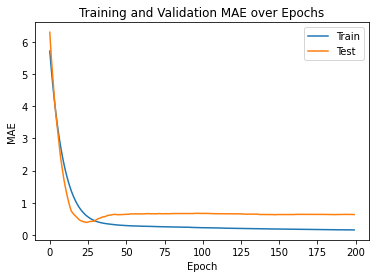

In [124]:
# Train with evaluation set
evalset = [(X_train, y_train), (X_test, y_test)]
best_model = XGBRegressor(random_state=42, **best_params)
best_model.fit(X_train, y_train, eval_metric='mae', eval_set=evalset, verbose=False)

# Predict and evaluate
yhat = best_model.predict(X_test)
mae = mean_absolute_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f"Mean Absolute Error: {mae:.3f}")
print(f"R² Score: {r2:.3f}")

# Retrieve and plot learning curve
results = best_model.evals_result()
plt.plot(results['validation_0']['mae'], label='Train')
plt.plot(results['validation_1']['mae'], label='Test')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.title('Training and Validation MAE over Epochs')
plt.legend()
plt.show()

In [125]:
"""# run the test1 ML(RDKit + RootedCBH + QM)

#rmse = mean_squared_error(y_test, y_pred, squared=False) doesnt work :(

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"MAE: {mae:.4f}")
# Plot predicted vs actual
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual pKa")
plt.ylabel("Predicted pKa")
plt.title("XGBoost: Predicted vs Actual pKa")
plt.grid(True)
plt.show()"""

'# run the test1 ML(RDKit + RootedCBH + QM)\n\n#rmse = mean_squared_error(y_test, y_pred, squared=False) doesnt work :(\n\nmse = mean_squared_error(y_test, y_pred)\nrmse = mse ** 0.5\nmae = mean_absolute_error(y_test, y_pred)\nr2 = r2_score(y_test, y_pred)\n\nprint(f"Root Mean Squared Error (RMSE): {rmse:.4f}")\nprint(f"MAE: {mae:.4f}")\n# Plot predicted vs actual\nplt.figure(figsize=(6, 6))\nplt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k")\nplt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")\nplt.xlabel("Actual pKa")\nplt.ylabel("Predicted pKa")\nplt.title("XGBoost: Predicted vs Actual pKa")\nplt.grid(True)\nplt.show()'